In [1]:
import numpy as np
import pandas as pd
import gc

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

#import folium
#from fbprophet import Prophet
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#import pickle

In [3]:
path = "../Data/"
print("Read train file to obtain some statistic about the features and target")
train = pd.read_csv(path + 'renamed_train_2016.csv', parse_dates=['date'])
train = train.drop("id", axis=1)

train["month"] = train['date'].dt.month

Read train file to obtain some statistic about the features and target


In [6]:
me = np.mean(train['logerror']); med = np.median(train['logerror']); st = train['logerror'].std(); 
print(train['logerror'].describe())

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64


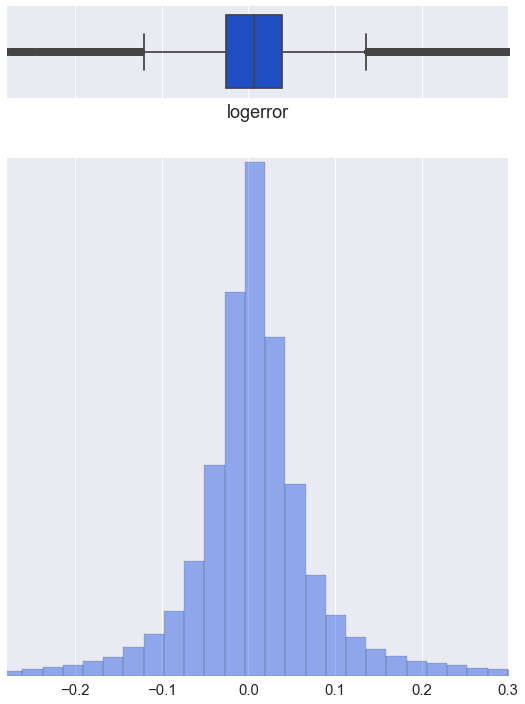

In [25]:
#plt.style.use('fivethirtyeight')
#sns.set_style("white")
#sns.set_style("dark")
#sns.set(font_scale=3) 

x = train['logerror']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True ,
                                    gridspec_kw={"height_ratios": (.15, .85)}, figsize=(9,12))
sns.boxplot(x, ax=ax_box, color=sns.xkcd_rgb["blue"])
sns.distplot(x, ax=ax_hist, bins=400, kde=False, color=sns.xkcd_rgb["blue"])
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.xlim([me-1.8*st, me+1.8*st])


ax_box.set_xlabel('logerror', fontsize=18)
ax_hist.set_xlabel('', fontsize=18)

ax_hist.axes.get_yaxis().set_visible(False)
#plt.axis('off')
plt.show()

In [27]:
train["out"] = 0
train.loc[train.logerror > 0.264, "out"] = 1
train.loc[train.logerror < -0.252, "out"] = 1

sum_out = train.groupby("month")["out"].sum().to_dict()
sum_tra = train.groupby("month")["id_parcel"].count().to_dict()

ll = []
for ii in range(1,13):
    aa = (np.float(sum_out[ii]) / sum_tra[ii])*100
    ll.append(aa)

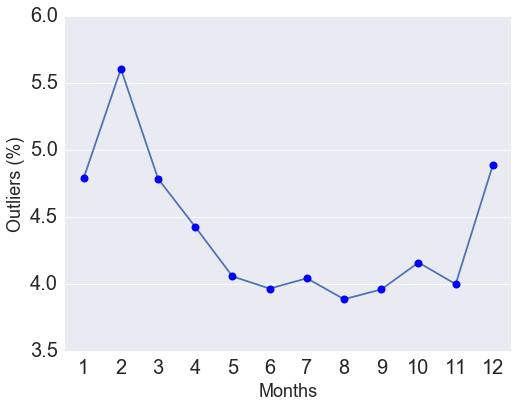

In [49]:
plt.figure(figsize=(8,6))
sns.stripplot(x=range(1,13), y=ll, color="b", size=8)
plt.plot(ll)

plt.xlabel('Months', fontsize=18)
plt.ylabel('Outliers (%)', fontsize=18)

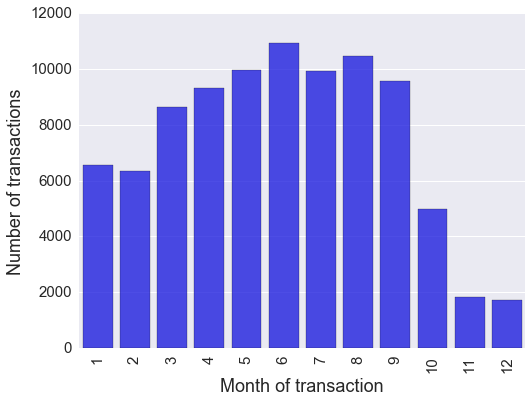

In [12]:
cnt_srs = train['month'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='b')
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=18)
plt.ylabel('Number of transactions', fontsize=18)
sns.despine()
plt.show()

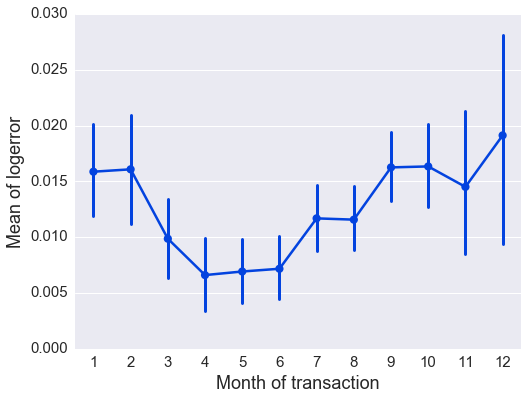

In [15]:
#sns.set_style("white")
sns.set(font_scale=1.5)
plt.figure(figsize=(8,6))
ax = sns.pointplot(x="month", y="logerror", data=train, errwidth=3.0, scale=.8, color=sns.xkcd_rgb["blue"])
plt.xlabel('Month of transaction', fontsize=18)
plt.ylabel('Mean of logerror', fontsize=18)

In [5]:
out = pd.read_csv('outliers.csv')

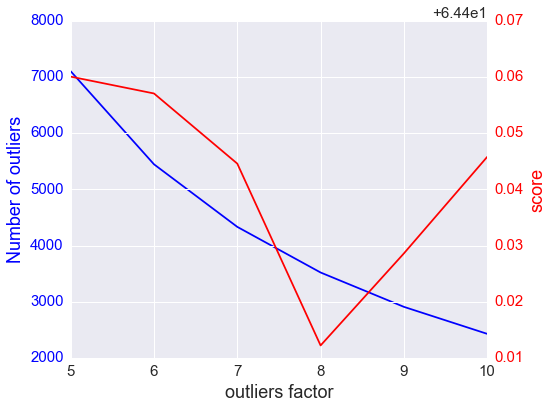

In [10]:
sns.set_style()
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(8,6))


ax1.plot(out.fac, out.outliers, 'b-')
ax1.set_xlabel('outliers factor', fontsize=18)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Number of outliers', color='b', fontsize=18)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(out.fac, out.score*1000, 'r-')
ax2.set_ylabel('score', color='r', fontsize=18)
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [14]:
out = pd.read_csv('xgb1_score.csv')

In [15]:
xmed = out["CV1"].median()

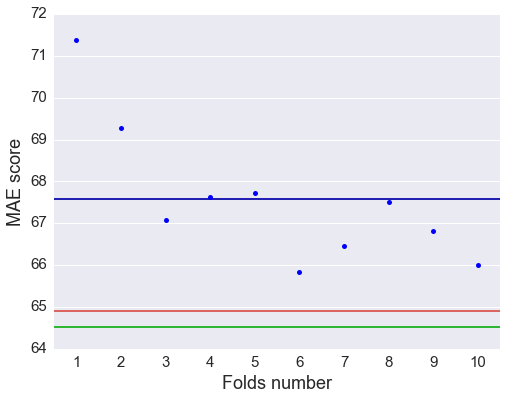

In [18]:
plt.figure(figsize=(8,6))
sns.stripplot(x=range(1,11), y=out.CV1*1000, color="b")

score_LB = 0.0645248 * 1000
score_3M = 0.0649093 * 1000
score_CV = 0.0675711 * 1000

x = plt.gca().axes.get_xlim()
# how to plot median line?
plt.plot(x, len(x) * [score_LB], sns.xkcd_rgb["green"])
plt.plot(x, len(x) * [score_3M], sns.xkcd_rgb["pale red"])
plt.plot(x, len(x) * [score_CV], sns.xkcd_rgb["royal blue"])

plt.xlabel('Folds number', fontsize=18)
plt.ylabel('MAE score', fontsize=18)

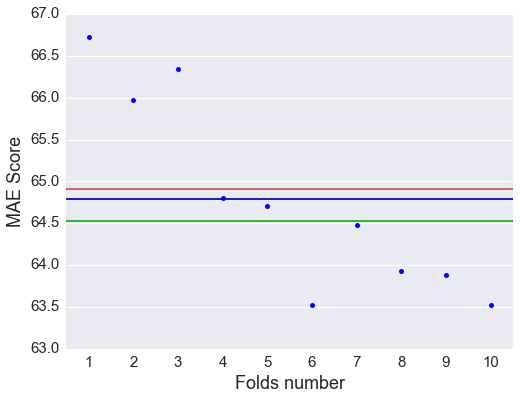

In [20]:
plt.figure(figsize=(8,6))
sns.stripplot(x=range(1,11), y=out.CV2*1000, color="b")

score_LB = 0.0645248 * 1000
score_3M = 0.0649093 * 1000
score_CV = 0.0647889 * 1000

x = plt.gca().axes.get_xlim()
# how to plot median line?
plt.plot(x, len(x) * [score_LB], sns.xkcd_rgb["green"])
plt.plot(x, len(x) * [score_3M], sns.xkcd_rgb["pale red"])
plt.plot(x, len(x) * [score_CV], sns.xkcd_rgb["royal blue"])

plt.xlabel('Folds number', fontsize=18)
plt.ylabel('MAE Score', fontsize=18)

In [4]:
prop = pd.read_csv(path + 'renamed_properties_2016.csv')
train = pd.merge(train, prop, on="id_parcel", how="left")
del prop
gc.collect()

C:\Users\Amin\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


42

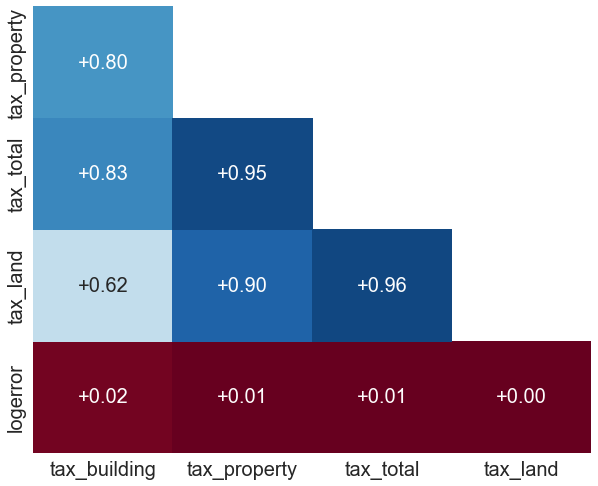

In [32]:
tax = ["tax_building", "tax_property", "tax_total", "tax_land"]
xx = train[tax + ["logerror"]]

corr = xx.corr()

corr.drop(['tax_building'], axis=0, inplace=True)
corr.drop(['logerror'], axis=1, inplace=True)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

fig, axs = plt.subplots(figsize=(10, 8))
axs.set_axis_bgcolor("white")
                     
with sns.axes_style("white"):
    sns.heatmap(abs(corr), mask=mask, annot=True, annot_kws={"size":20}, cmap='RdBu', fmt='+.2f', cbar=False)

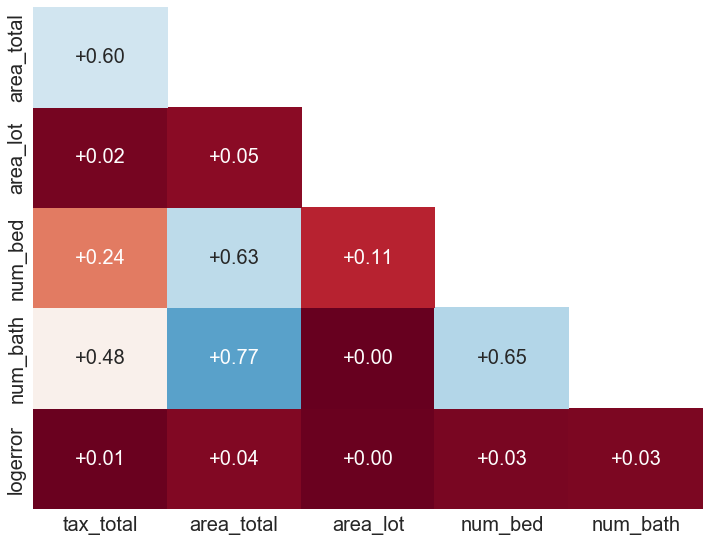

In [33]:
tax = ["tax_total", "area_total_calc", "area_lot", "num_bedroom", "num_bathroom"]
xx = train[tax + ["logerror"]]

xx.columns = ["tax_total", "area_total", "area_lot", "num_bed", "num_bath", "logerror"]

corr = xx.corr()

corr.drop(['tax_total'], axis=0, inplace=True)
corr.drop(['logerror'], axis=1, inplace=True)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

fig, axs = plt.subplots(figsize=(12, 9))
axs.set_axis_bgcolor("white")
                     
with sns.axes_style("white"):
    sns.heatmap(abs(corr), mask=mask, annot=True, annot_kws={"size":20}, cmap='RdBu', fmt='+.2f', cbar=False)

In [34]:
number = ["num_bathroom", "num_bedroom", "num_bathroom_calc", "num_fireplace", "num_bath", "num_garage", "num_pool", 
          "num_room", "num_75_bath", "num_unit", "num_story"]
quality = ["type_aircon", "type_architectural", "type_framing", "type_quality", "type_deck", "type_heating", 
           "pooltypeid10", "pooltypeid2", "pooltypeid7", "type_zoning_landuse", "type_story", "type_material"]
position = ["region_city", "region_county", "region_neighbor", "region_zip", "zoning_landuse_county", 
             "zoning_property", "censustractandblock", "rawcensustractandblock"]

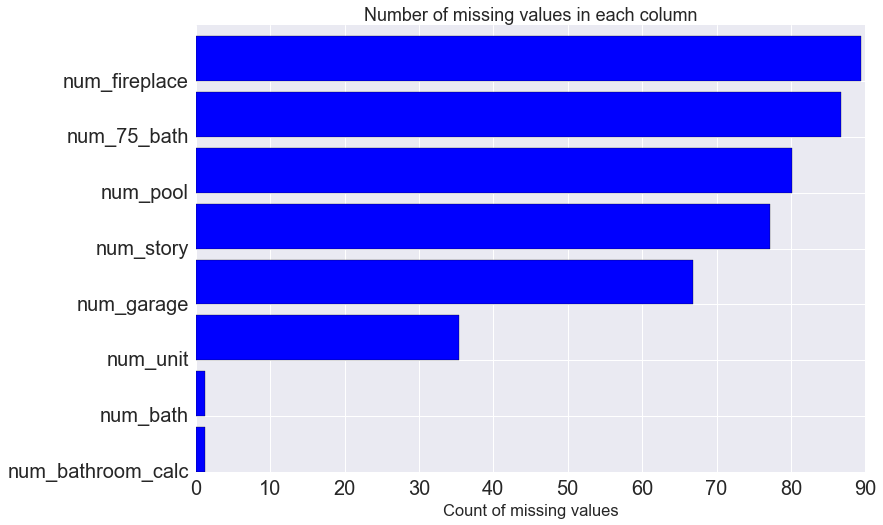

In [35]:
missing_df = train[number].isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df['missing_count'] = (missing_df['missing_count'] / train.shape[0]) * 100

ind = np.arange(missing_df.shape[0])
width = 1.
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
#ax.set_title("Number of missing values in each column")
plt.show()

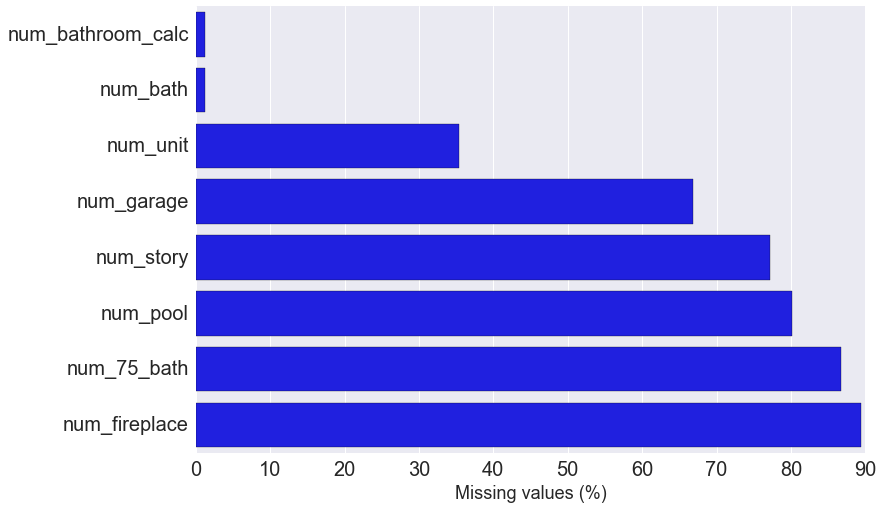

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="missing_count", y="column_name", data=missing_df, color="b")
ax.set_xlabel("Missing values (%)", fontsize=18)
ax.set_ylabel("")

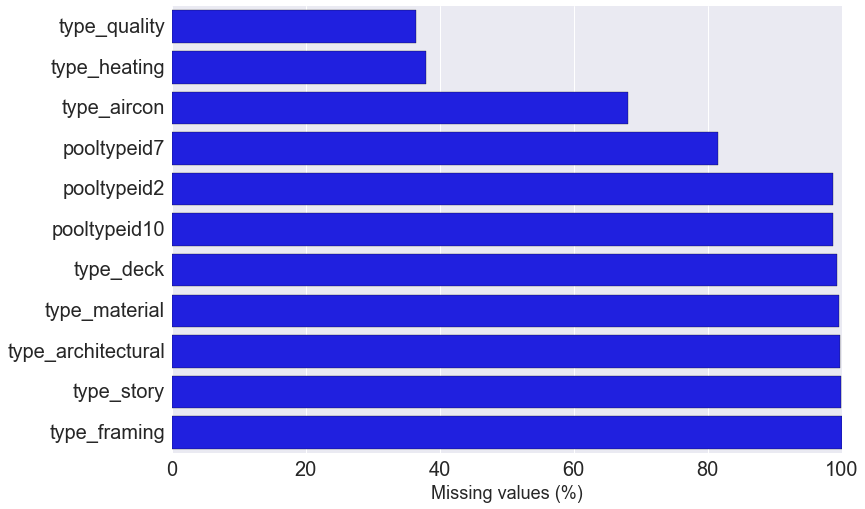

In [40]:
missing_df = train[quality].isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df['missing_count'] = (missing_df['missing_count'] / train.shape[0]) * 100

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="missing_count", y="column_name", data=missing_df, color="b")
ax.set_xlabel("Missing values (%)", fontsize=18)
ax.set_ylabel("")

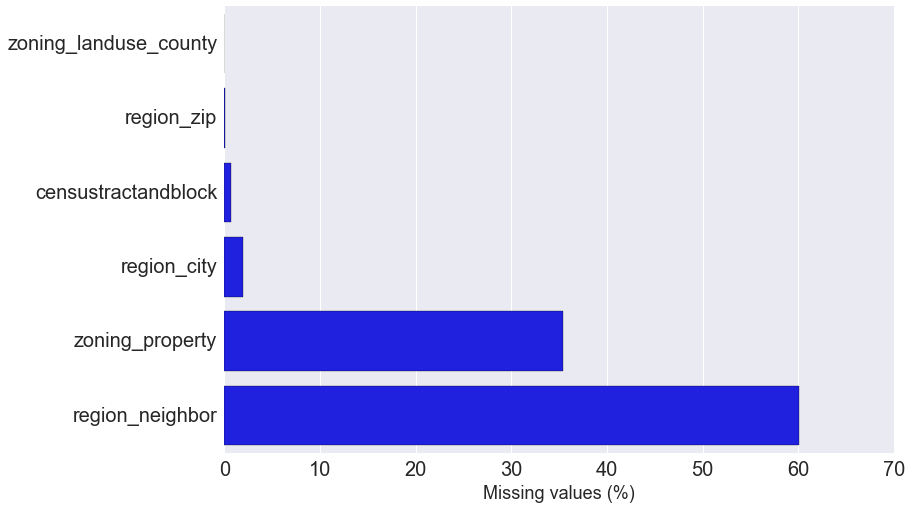

In [51]:
position = ["region_city", "region_county", "region_neighbor", "region_zip", "zoning_landuse_county", 
             "zoning_property", "censustractandblock", "rawcensustractandblock", "latitude"]

missing_df = train[position].isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df['missing_count'] = (missing_df['missing_count'] / train.shape[0]) * 100

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="missing_count", y="column_name", data=missing_df, color="b")
ax.set_xlabel("Missing values (%)", fontsize=18)
ax.set_ylabel("")

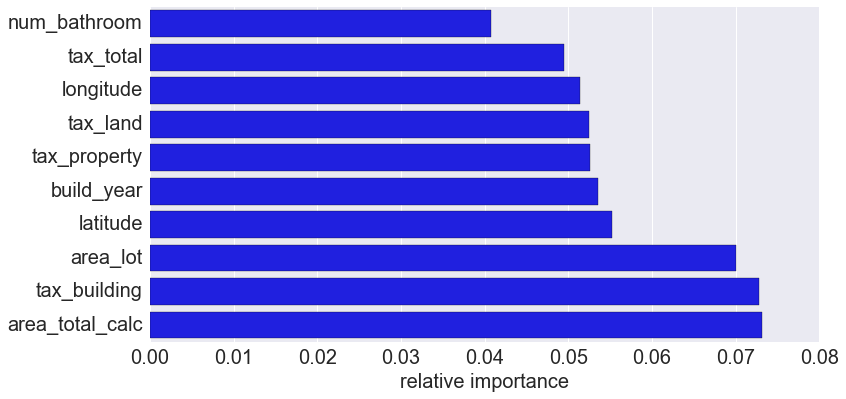

In [59]:
imp = pd.read_csv(path + 'importance.csv')
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x="fscore", y="feature", data=imp[-10:], color="b")
ax.set_xlabel("relative importance", fontsize=20)
ax.set_ylabel("")

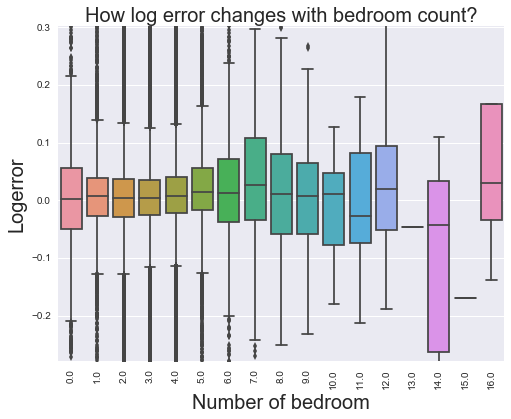

In [7]:

#plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="num_bedroom", y="logerror", data=train)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How log error changes with bedroom count?", fontsize=20)
plt.ylim([me-1.8*st, me+1.8*st])
ax.set_xlabel("Number of bedroom", fontsize=20)
ax.set_ylabel("Logerror", fontsize=20)
plt.show()

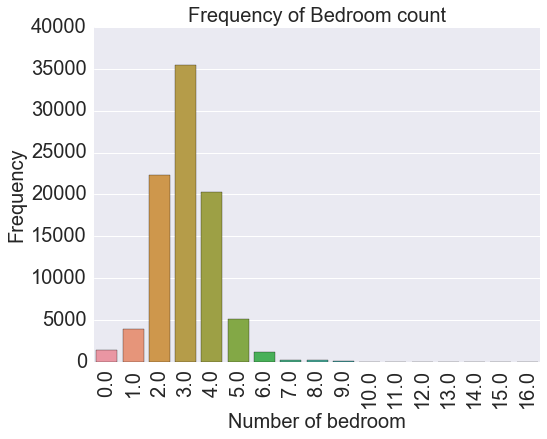

In [71]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="num_bedroom", data=train)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=20)
ax.set_xlabel("Number of bedroom", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

plt.show()

In [79]:
cluster = pd.read_csv("cluster.csv")
cluster = cluster.sort_values("n_clusters")

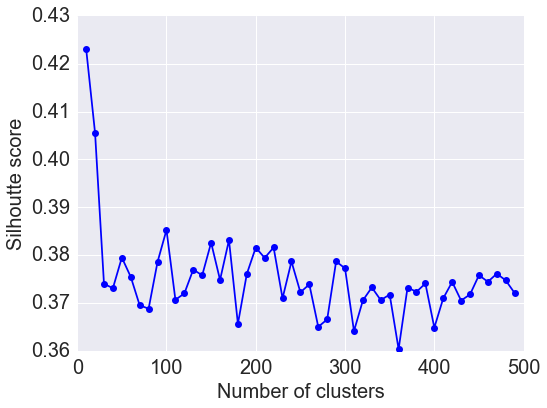

In [91]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(cluster.n_clusters, cluster.score, 'bo', cluster.n_clusters, cluster.score, 'b')

plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('Silhoutte score', fontsize=20)